<font size=5>**Чалова Ирина ИМБО-01-19**

# **Прикладные задачи нелинейной динамики**
## **Лабораторная работа №9. Критерии детерминированного хаоса**
### **Компьютерное моделирование зависимости показателя Ляпунова от параметра логистического отображения, построение спектра Фурье, автокорелляционной и структурной функции.**

### Показатель Ляпунова

На бифуркационной диаграмме в закритической области, за точкой $r^∞$, 
периодические режимы чередуются с режимом, который называют 
**детерминированным хаосом**. 

Итерации функции последования $f$ порождают последовательность таких значений x, которые:

а) не повторяются, 

б) зависят от начального значения $x_0$.

Логистическое отображение (вариант $1$):
$$ x_{n+1}=1-r · x_n^2, (0<r≤2)$$

Логистическое преобразование делает невозможным знание прошлых 
значений $x$, а также вследствие чрезвычайной зависимости от начальных 
условий предсказание будущих значений $x$ через какой-то период времени.

Одним из критериев, позволяющих диагностировать детерминированный 
хаос в динамических системах, является **ляпуновский показатель**. Хаос в 
детерминированных системах подразумевает чувствительную зависимость от 
начальных условий. Другими словами, две траектории, близкие друг к другу в 
фазовом пространстве в некоторый начальный момент времени, 
экспоненциально расходятся за малое в среднем время.

Если $d_0$ - мера
начального расстояния между двумя исходными точками, то спустя малое время $t$, расстояние между траекториями, выходящими из этих точек, 
становится равным 
$$ d(t) = d_0 · e ^ {Λ · t } $$.

Величину $Λ$ называют показателем Ляпунова. 

Для регулярных движений $Λ<0$ (движение устойчиво), в хаотических режимах 
$Λ>0$ (движение неустойчиво), нулевое значение $Λ=0$ определяет пограничное 
критическое состояние.

In [ ]:
library(ggplot2)

# Опции для построения графиков
options(repr.plot.width=16,         # Ширина картинки
        repr.plot.height=10)        # Высота картинки

In [ ]:
x0 <- 0.5
r0 <- 0
max <- 2
delta <- 0.001
j1 <- 150
j2 <- 500
v <- vector(mode = "numeric")
vj <- vector(mode = "numeric")
resv <- vector(mode = "numeric")
resj <- vector(mode = "numeric")
i <- 0
x <- x0

for (r in seq(r0,max,delta)) {
    for (j in c(0:j1)) {
        x <- 1 - r * x ** 2
    }

    for (j in c(0:j2)) {
        x <- 1 - r * x ** 2
        v[j] <- x
        vj[j] <- r
    }
    
    resv <- c(resv,v)
    resj <- c(resj,vj)
    i <- i + 1 
}

In [ ]:
tree <- ggplot() +
    geom_point(aes(y = resv, x = resj), cex = .01) +
    theme(axis.text.x = element_text(angle = 250)) +
    labs(title = "Бифуркационная диаграмма (дерево Фейгенбаума)", 
         subtitle = "x_(n+1)=1-r·x_n^2",
         x = "r", 
         y = "x_(n+1)=1-r·x_n^2") +
    scale_x_continuous(breaks = seq(r0, max, 0.05)) +
    scale_y_continuous(breaks = seq(0, 4, 0.2)) 
    geom_vline(xintercept = c(0.751, 1.251, 1.37, 1.396, 1.475, 1.625, 1.75), color = "blue", lwd = .3) 

mapping: xintercept = ~xintercept 
geom_vline: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

Показатель Ляпунова для траектории одномерного точечного отображения $x_{n+1}=f(x_n)$ находится:

$$Λ(x_n) = \lim_{n\to \infty}\frac{\sum{_{i=0}^{n-1}}\log{|{f'(x_i)}|}}{n+1}$$

Зависимость показателя Ляпунова от параметра $r$ для логистического 
отображения:

In [ ]:
x0 <- 0.1
r0 <- 0
max <- 2
delta <- 0.001
j1 <- 150
j2 <- 500
i <- c(0:(length(unique(resj)) - 2))
r <- vector(mode = "numeric", length = length(i))
r <- rep(r0, length(i))
delta <- seq(0, delta * max(i), delta)
r <- r + delta
u <- c(-2:1)
AL <- vector(mode = "numeric", length = length(i))

for (m in i) {
    cumsum <- 0
    for (j in c((j2 - j1):j2)) {
        cumsum <- cumsum + log(abs(- 2 * r[m] * resv[m * j2 + j]))
    }
    AL[m] <- cumsum / (j1 + 1) 
}

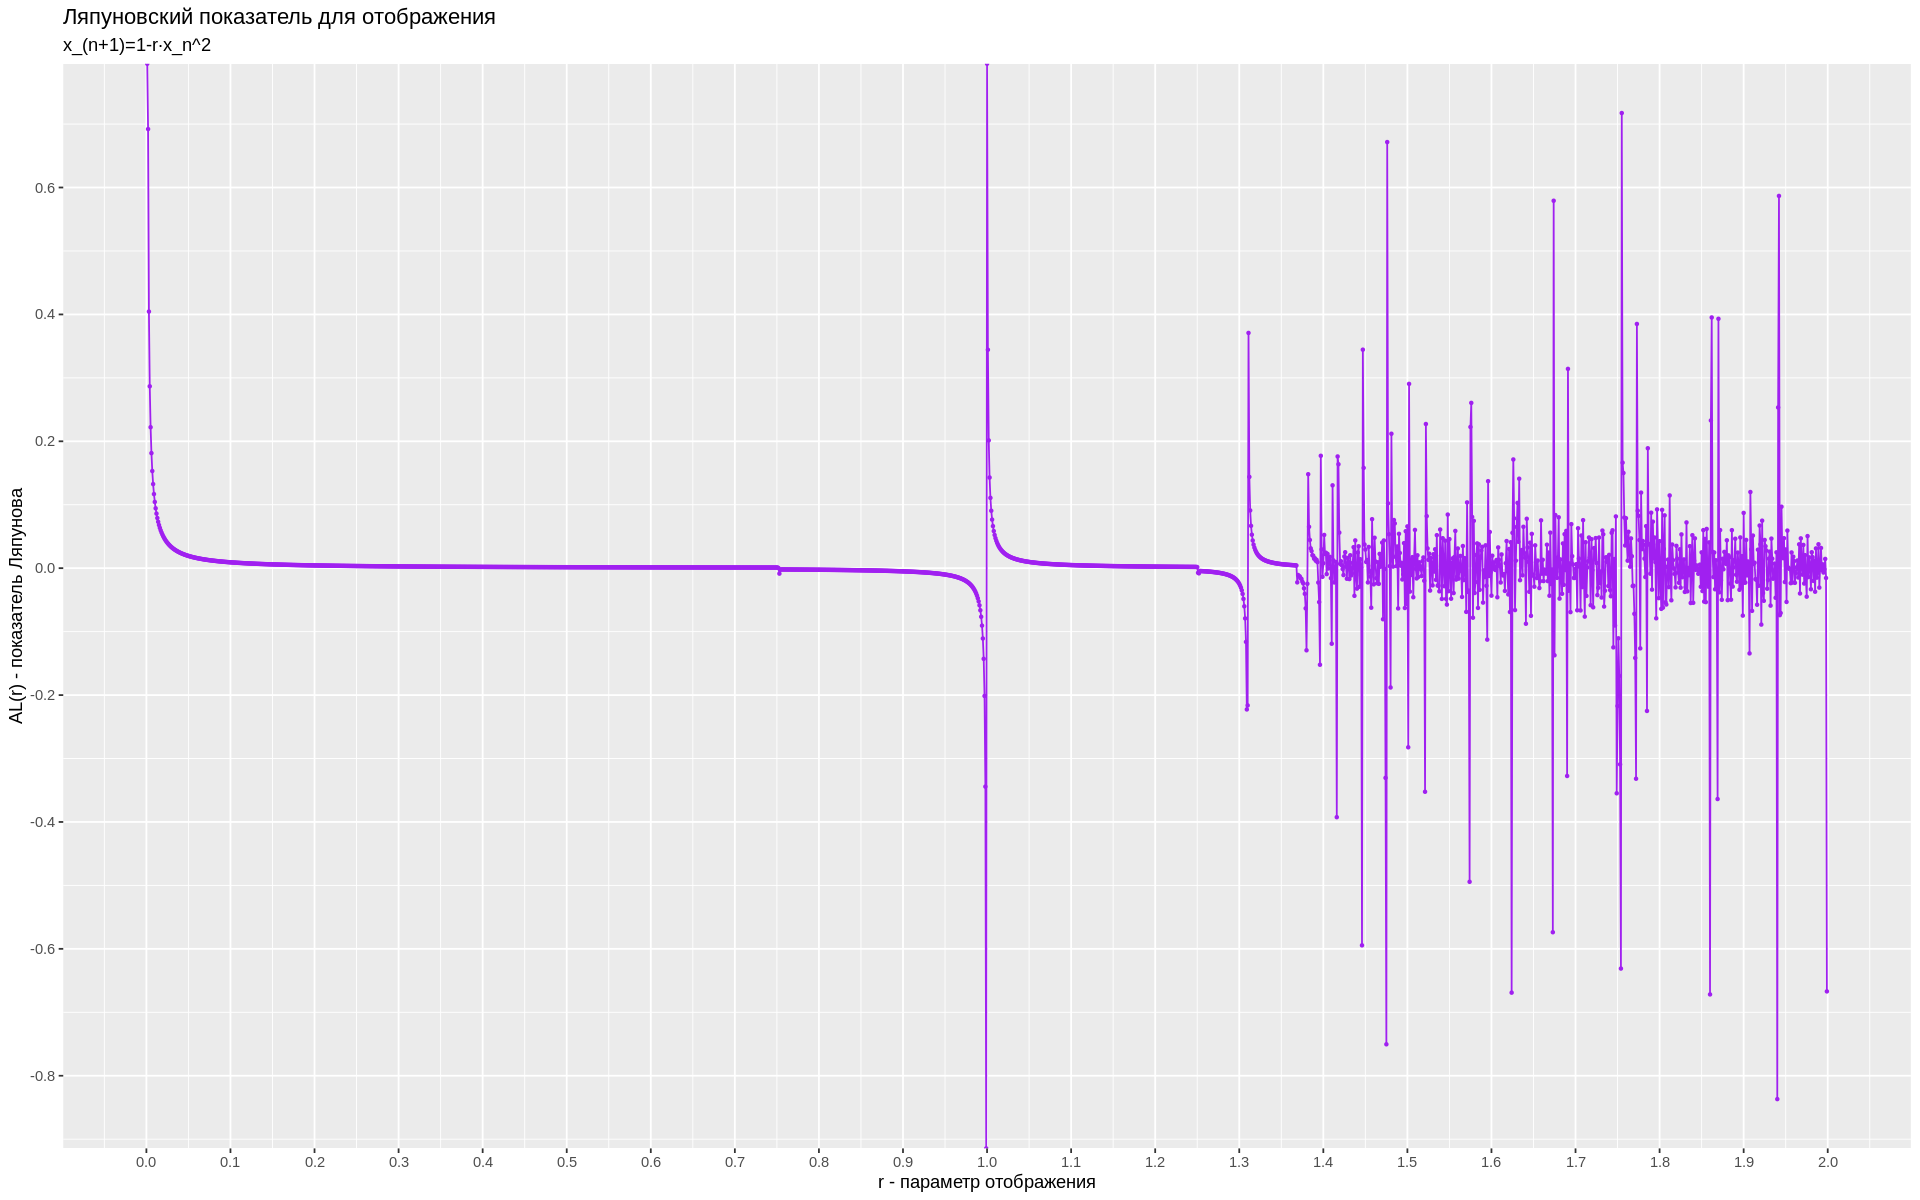

In [ ]:
ggplot() +
    geom_point(aes(y = diff(AL), x = r[-1]), cex = .6, color = "purple") +
    geom_line(aes(y = diff(AL), x = r[-1]), lwd = .5, color = "purple") +
    scale_x_continuous(breaks = seq(0, 2, 0.1)) +
    scale_y_continuous(breaks = seq(-3, 1, 0.2)) +
    labs(title = "Ляпуновский показатель для отображения",
        subtitle = "x_(n+1)=1-r·x_n^2",
        x = "r - параметр отображения",
        y = "AL(r) - показатель Ляпунова")

$r > r^∞ > 1,4$

Левее $r^∞$ ясно видны относительно широкие по $r$ полосы с отрицательным показателем Ляпунова, $Λ(x)<0$, они отвечают периодическим движениям с небольшим периодом.

Для движений с большим периодом соответствующие им интервалы по $r$ 
меньше расстояния между точками на рисунке и поэтому не видны. Обнуление показателя Ляпунова $(Λ=0)$ соотносится с точками бифуркаций,
им отвечает ветвление решения $x$.

График зависимости показателя Ляпунова от параметра $r$ для выбранного
варианта точечного отображения:

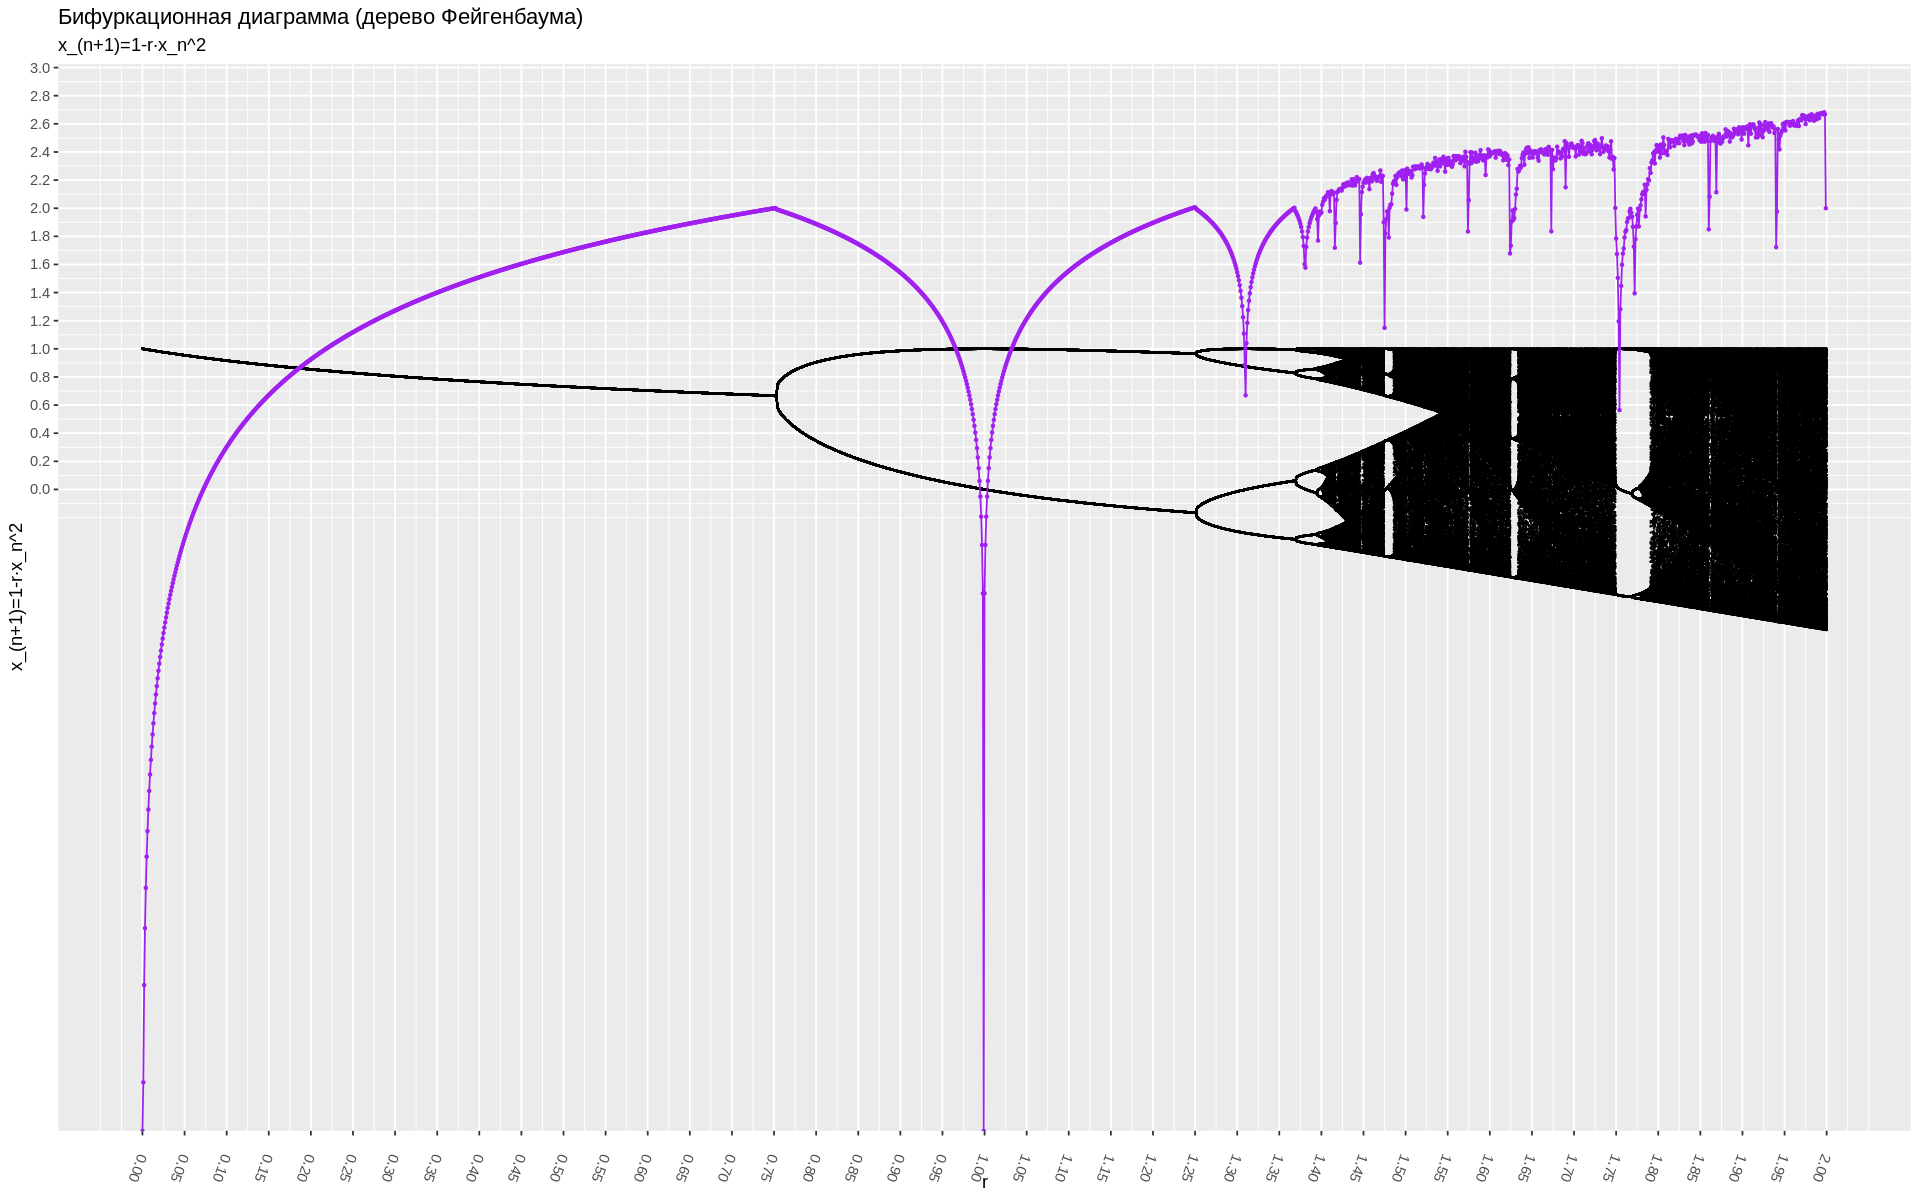

In [ ]:
tree +
 geom_point(aes(y = AL + 2, x = r), cex = .6, color = "purple") +
 geom_line(aes(y = AL + 2, x = r), lwd = .5, color = "purple")

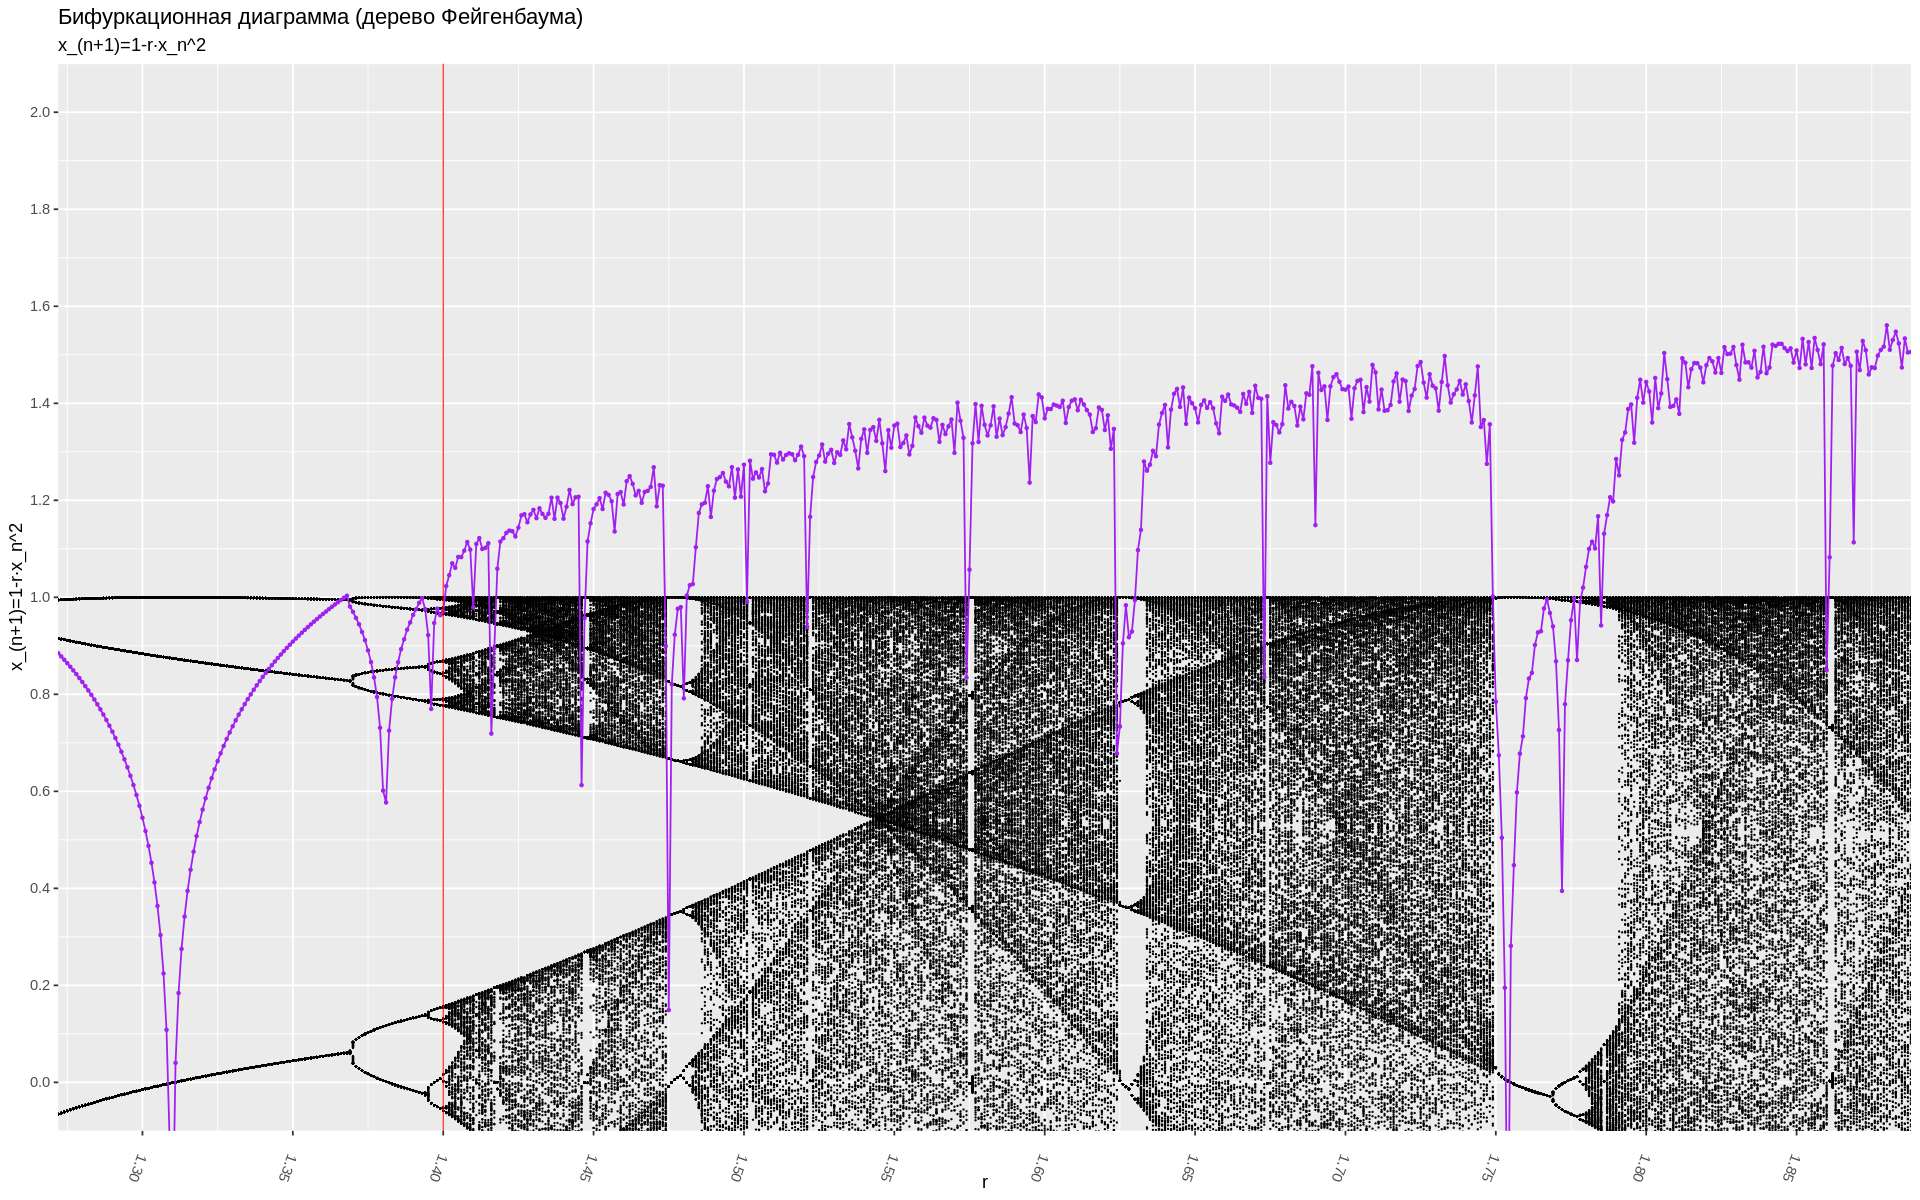

In [ ]:
tree +
 geom_point(aes(y = AL + 1, x = r), cex = .6, color = "purple") +
 geom_line(aes(y = AL + 1, x = r), lwd = .5, color = "purple") +
 coord_cartesian(ylim = c(0,2), xlim = c(1.3, 1.86)) +
 geom_vline(xintercept = c(1.4), color = "red", lwd = .3) 

Правее $r^∞$ имеется множество значений параметра $r$, для которых 
$Λ(x)>0$, что говорит о хаотической динамике.
В то же время здесь возникают "провалы" ляпуновского показателя $Λ$ в отрицательную область, которым соответствуют окна периодичности. 

Вертикальной линией показана точка сгущения $r^∞$, разделяющая 
регулярные режимы и хаос.

Таким образом, показатель Ляпунова выступает в качестве меры 
устойчивости динамической системы и является одним из критериев детерминированного хаоса. 


*Структурно, показатель Ляпунова показывает точки, в которых происходят изменения в 
поведении для дискретного отображения ДС. В точках AL = 0 можно наблюдать изменение 
характера решений и количества неподвижных точек для дискретного отображения. В AL < 0 
наблюдается устойчивое поведение отображения на интервале между точками бифуркации. В 
минимумах AL можно проследить точки пересечения траекторий диаграммы с критической 
точкой для отображения (где f ’(x) = 0), в данных точках ищем константу значение d для второй 
константы Фейгенбаума. AL > 0 наблюдаем в зоне хаотических колебаний.*

### Спектр Фурье

Преобразование Фурье осуществляет переход от сигналов, заданных 
во временном пространстве $x(t)$, к сигналам в частотном пространстве:

$$X(iω) = \int_{-∞}^{+∞} x(t) · e^{-i ωt} \ dx \$$

С помощью Фурье-спектра сигнала можно обнаружить различие между хаотическим и периодическим движением. Последнему случаю будет 
соответствовать несколько хорошо выраженных пиков на графике спектральной плотности $X(ω)=|X(iω)|$, тогда как хаотические колебания имеют 
широкий сплошной спектр. 

В случае точечных отображений приходится работать с дискретными последовательностями, поэтому удобно использовать одну из разновидностей алгоритма быстрого преобразования Фурье.

In [ ]:
# fft0 <- function(z, inverse=FALSE) {
#     n <- length(z)
#     if (n == 0) return(z)
#     k <- 0:(n - 1)

#     ff <- (if (inverse) 1 else -1) * 1i * k/n
    
#     vapply(1:n, function(h) sum(z * exp(ff * (h - 1))), complex(1))
# }

In [43]:
N <- 2 ^ 8
M <- 30
i <- c(1:(N))
n <- c(1:(N + M))
r <- c(0.751, 1.251, 1.37, 1.396, 1.475, 1.625, 1.75, 1.768, 1.777, 1.791)

x <- matrix(nrow = length(n), ncol = length(r))
x[1, ] <- 0.05
for (m in c(1:length(r))) {
    for (k in c(2:max(n))) {
        x[k,m] <- 1 - r[m] * (x[k - 1, m]) ** 2
    } 
 }

y <- matrix(nrow = length(i), ncol = length(r))
y <- x[i + M, ]

FFT <- matrix(nrow = length(i), ncol = length(r))
FFT <- fft(y) 
# SFFT <- matrix(nrow = length(i), ncol = length(r))

# for (o in c(1:length(r))) {
#     SFFT[, o] <- fft0(y[, o]) 
# }

j <- c(1:length(i))
omega <- j / N

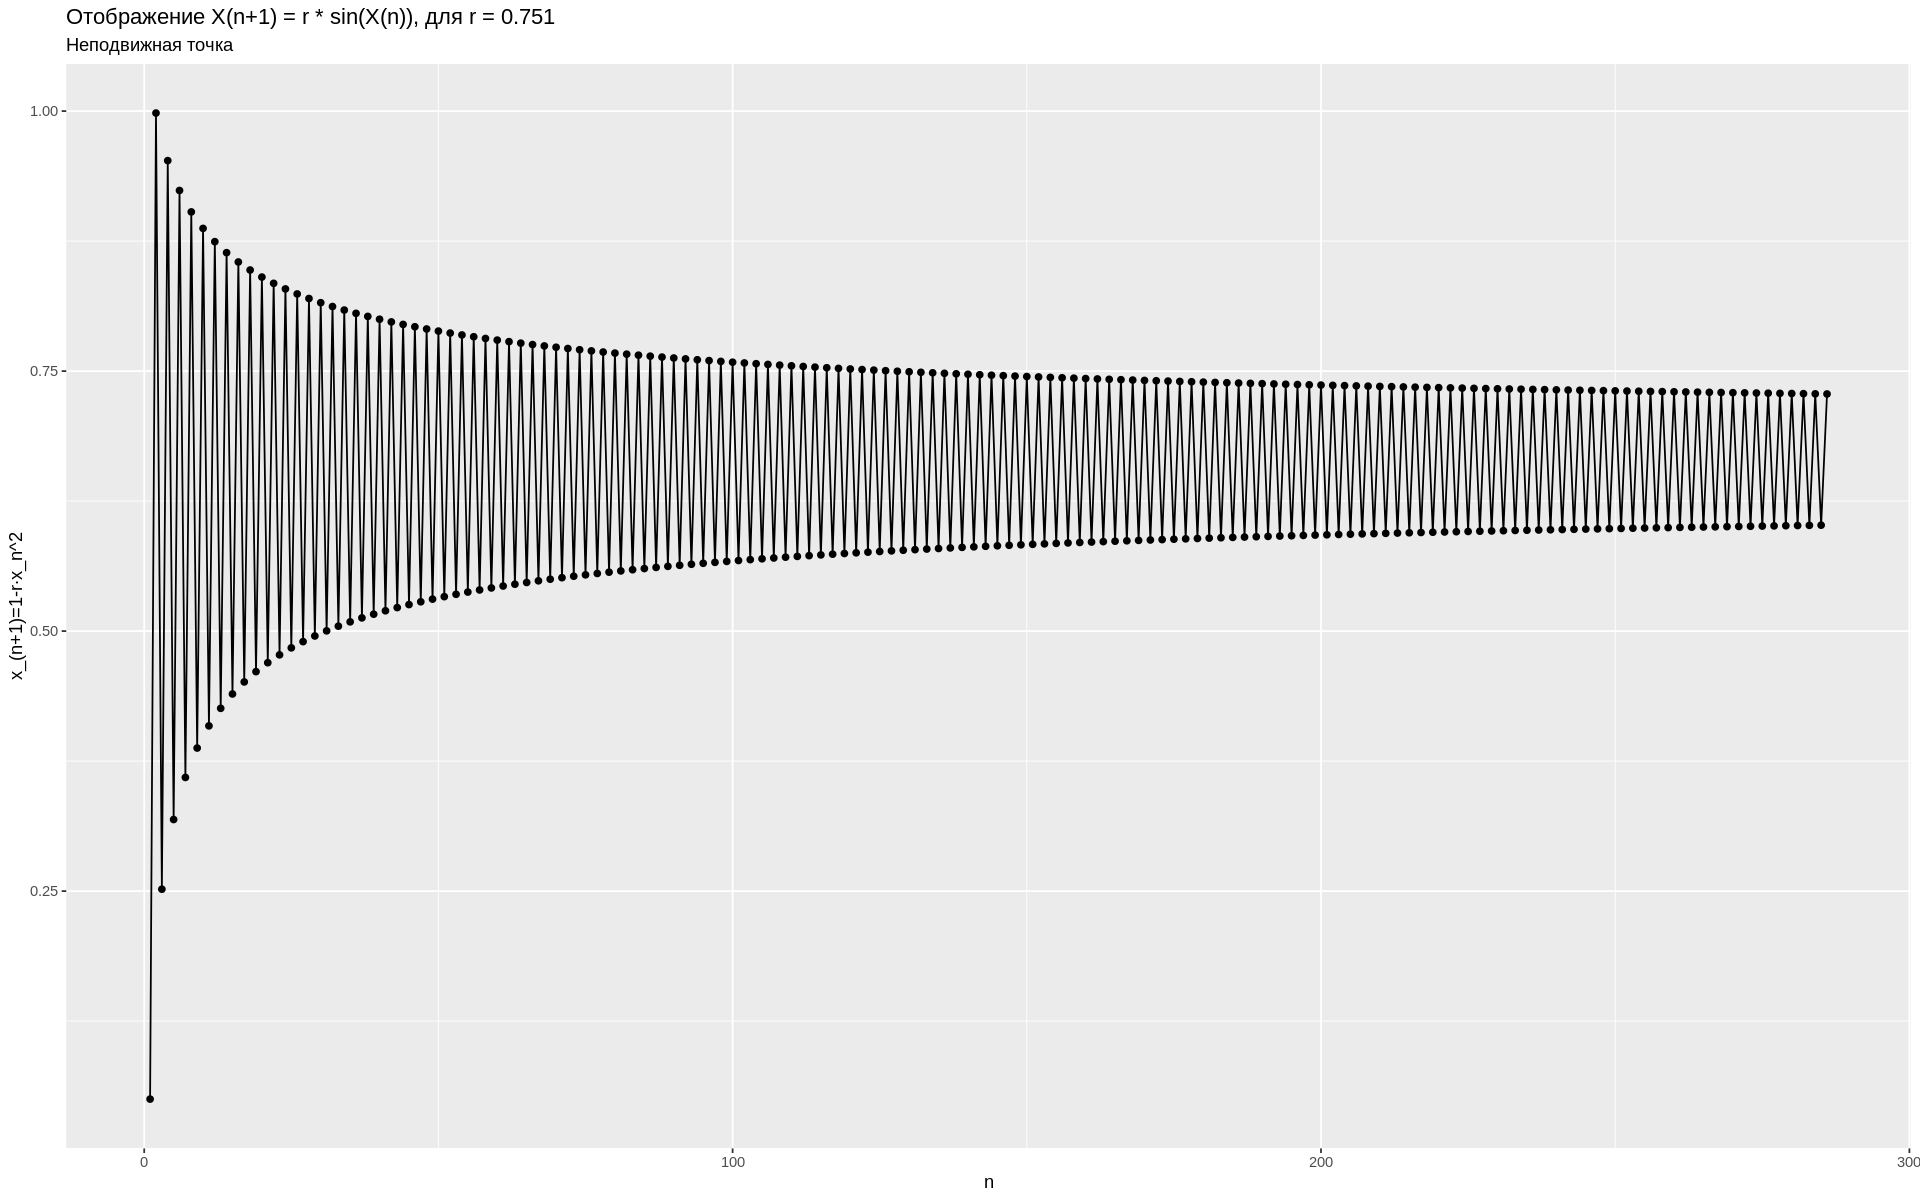

In [46]:
ggplot() +
 geom_line(aes(x = n, y = x[, 1])) +
 geom_point(aes(x = n, y = x[, 1])) +
 # coord_cartesian(ylim = c(1.75,2), xlim = c(5, 50)) 
 labs(title = paste("Отображение X(n+1) = r * sin(X(n)), для r =", r[1]),
 subtitle = "Неподвижная точка",
 y = "x_(n+1)=1-r·x_n^2",
 x = "n")

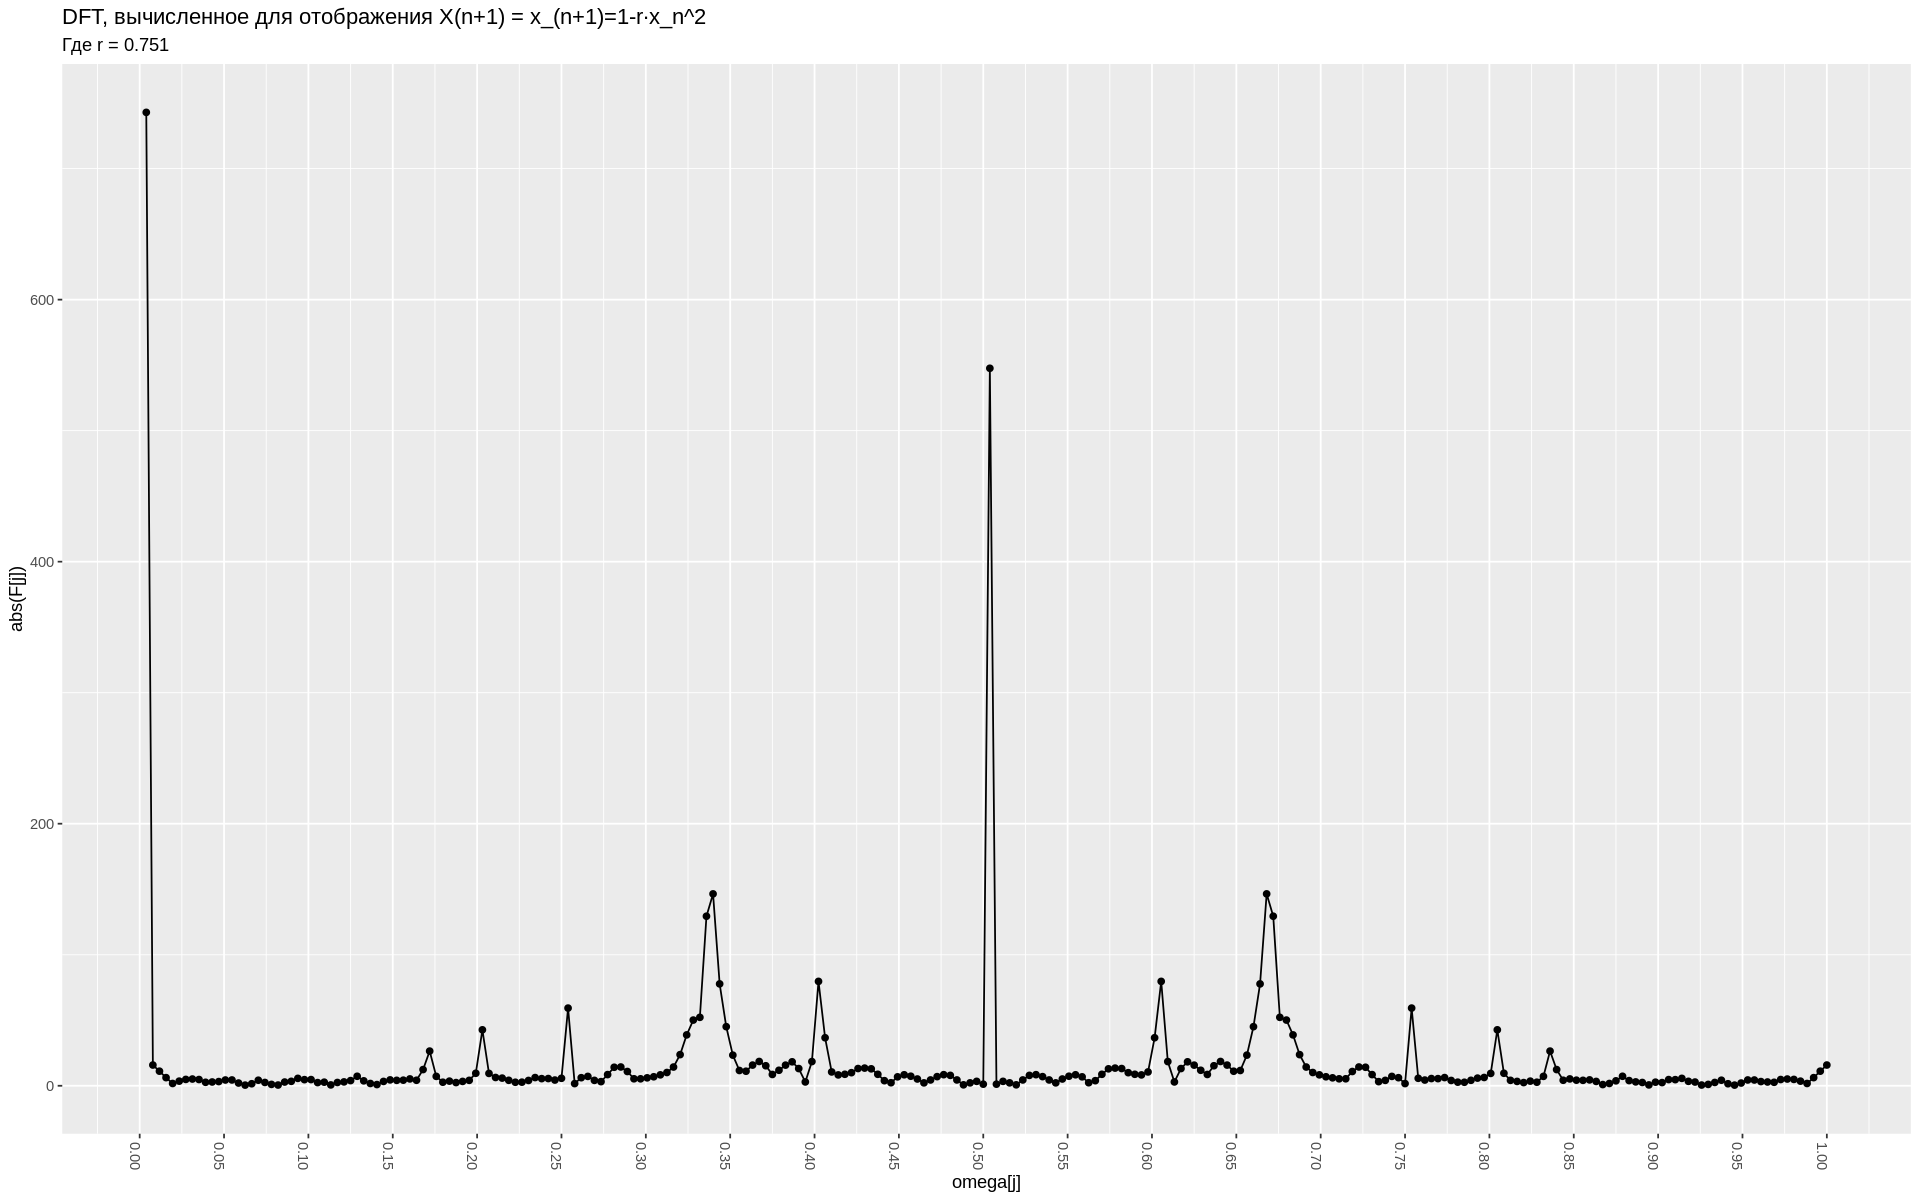

In [39]:
ggplot() +
    geom_point(aes( y = abs(FFT[, 1]), x = omega)) +
    geom_line(aes( y = abs(FFT[, 1]), x = omega)) +
    labs(title = paste("DFT, вычисленное для отображения X(n+1) = x_(n+1)=1-r·x_n^2"),
        subtitle = paste("Где r =", r[1]),
        x = "omega[j]",
        y = "abs(F[j])") +
    scale_x_continuous(breaks = seq(0, 1, 0.05)) +
    theme(axis.text.x = element_text(angle = 270, hjust = 1))

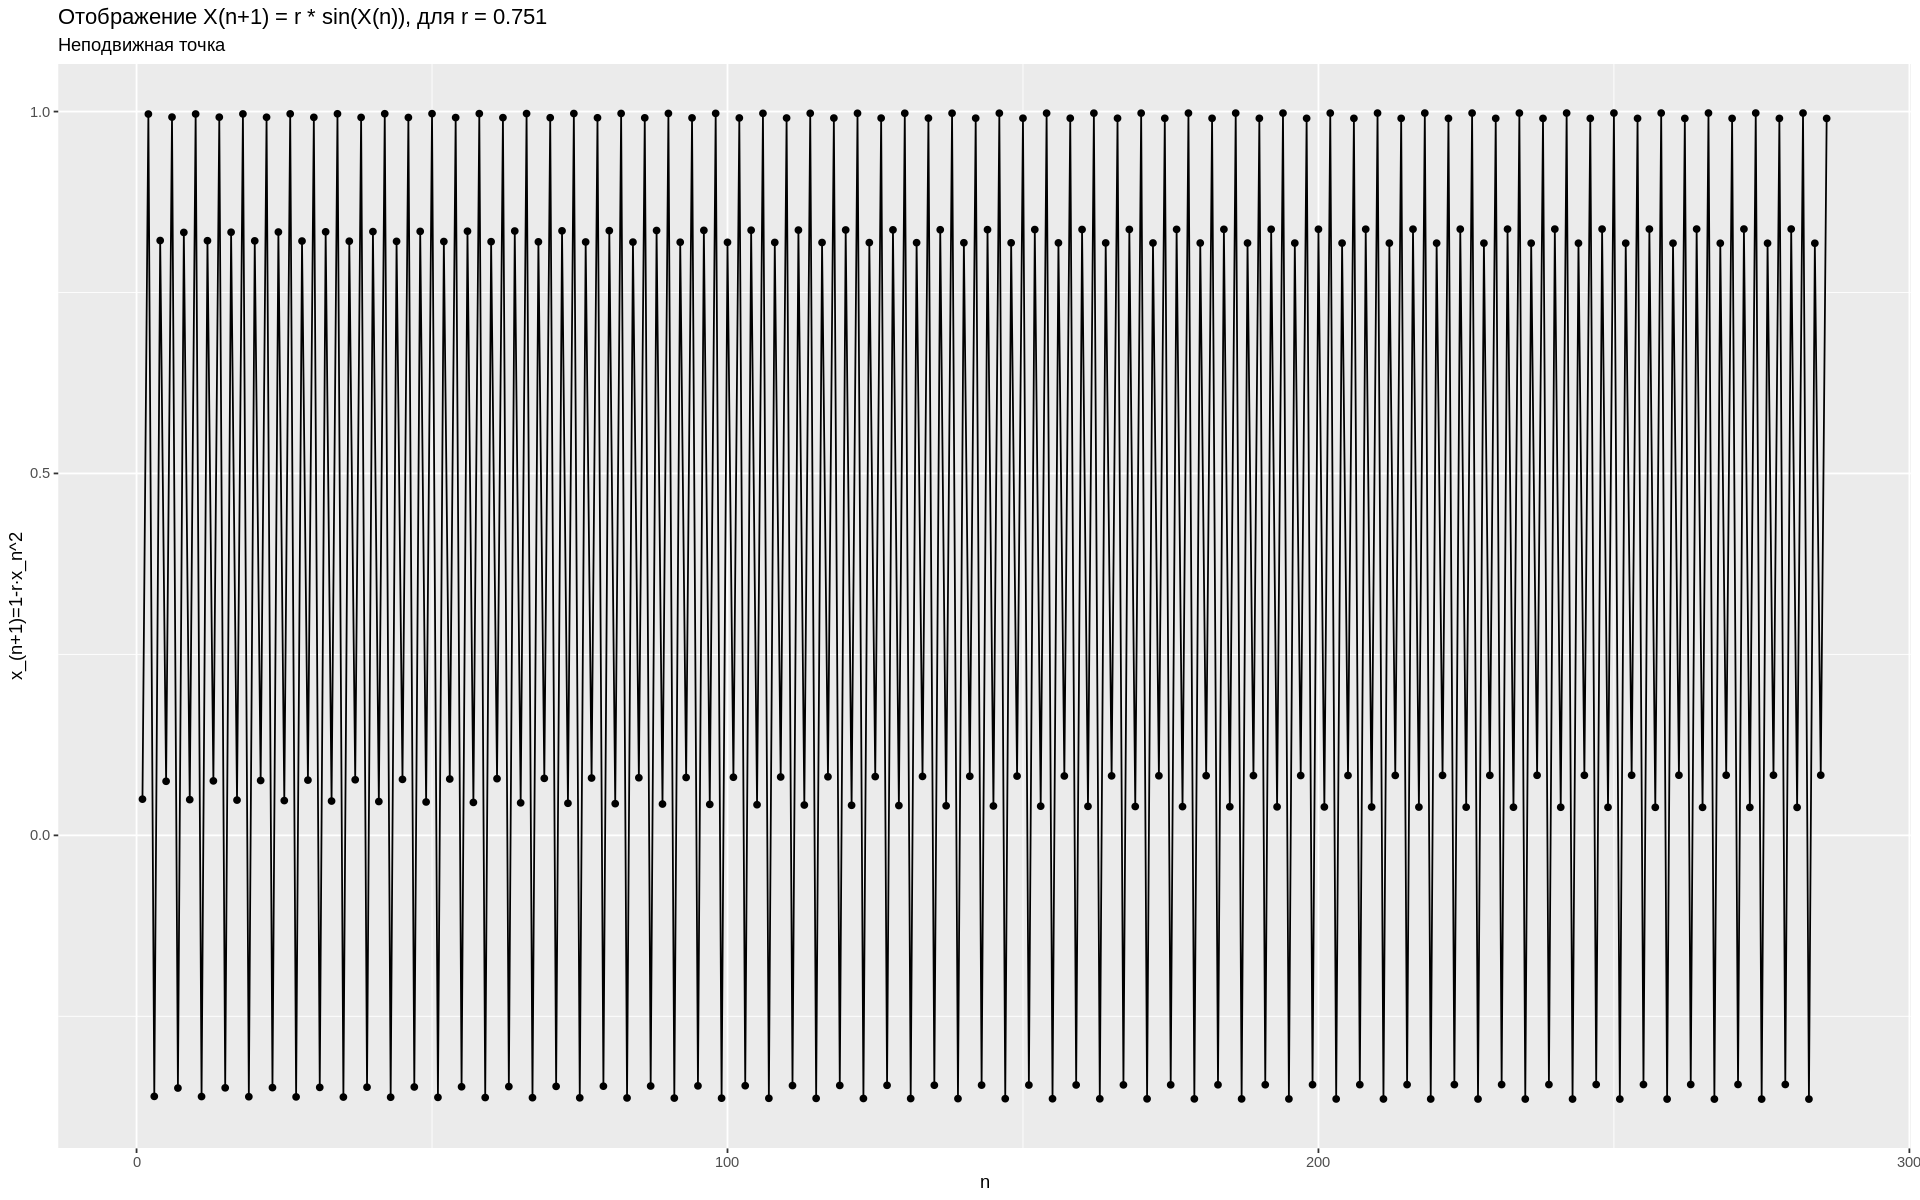

In [40]:
ggplot() +
 geom_line(aes(x = n, y = x[, 3])) +
 geom_point(aes(x = n, y = x[, 3])) +
 # coord_cartesian(ylim = c(1.75,2), xlim = c(5, 50)) 
 labs(title = paste("Отображение X(n+1) = r * sin(X(n)), для r =", r[1]),
 subtitle = "Неподвижная точка",
 y = "x_(n+1)=1-r·x_n^2",
 x = "n")

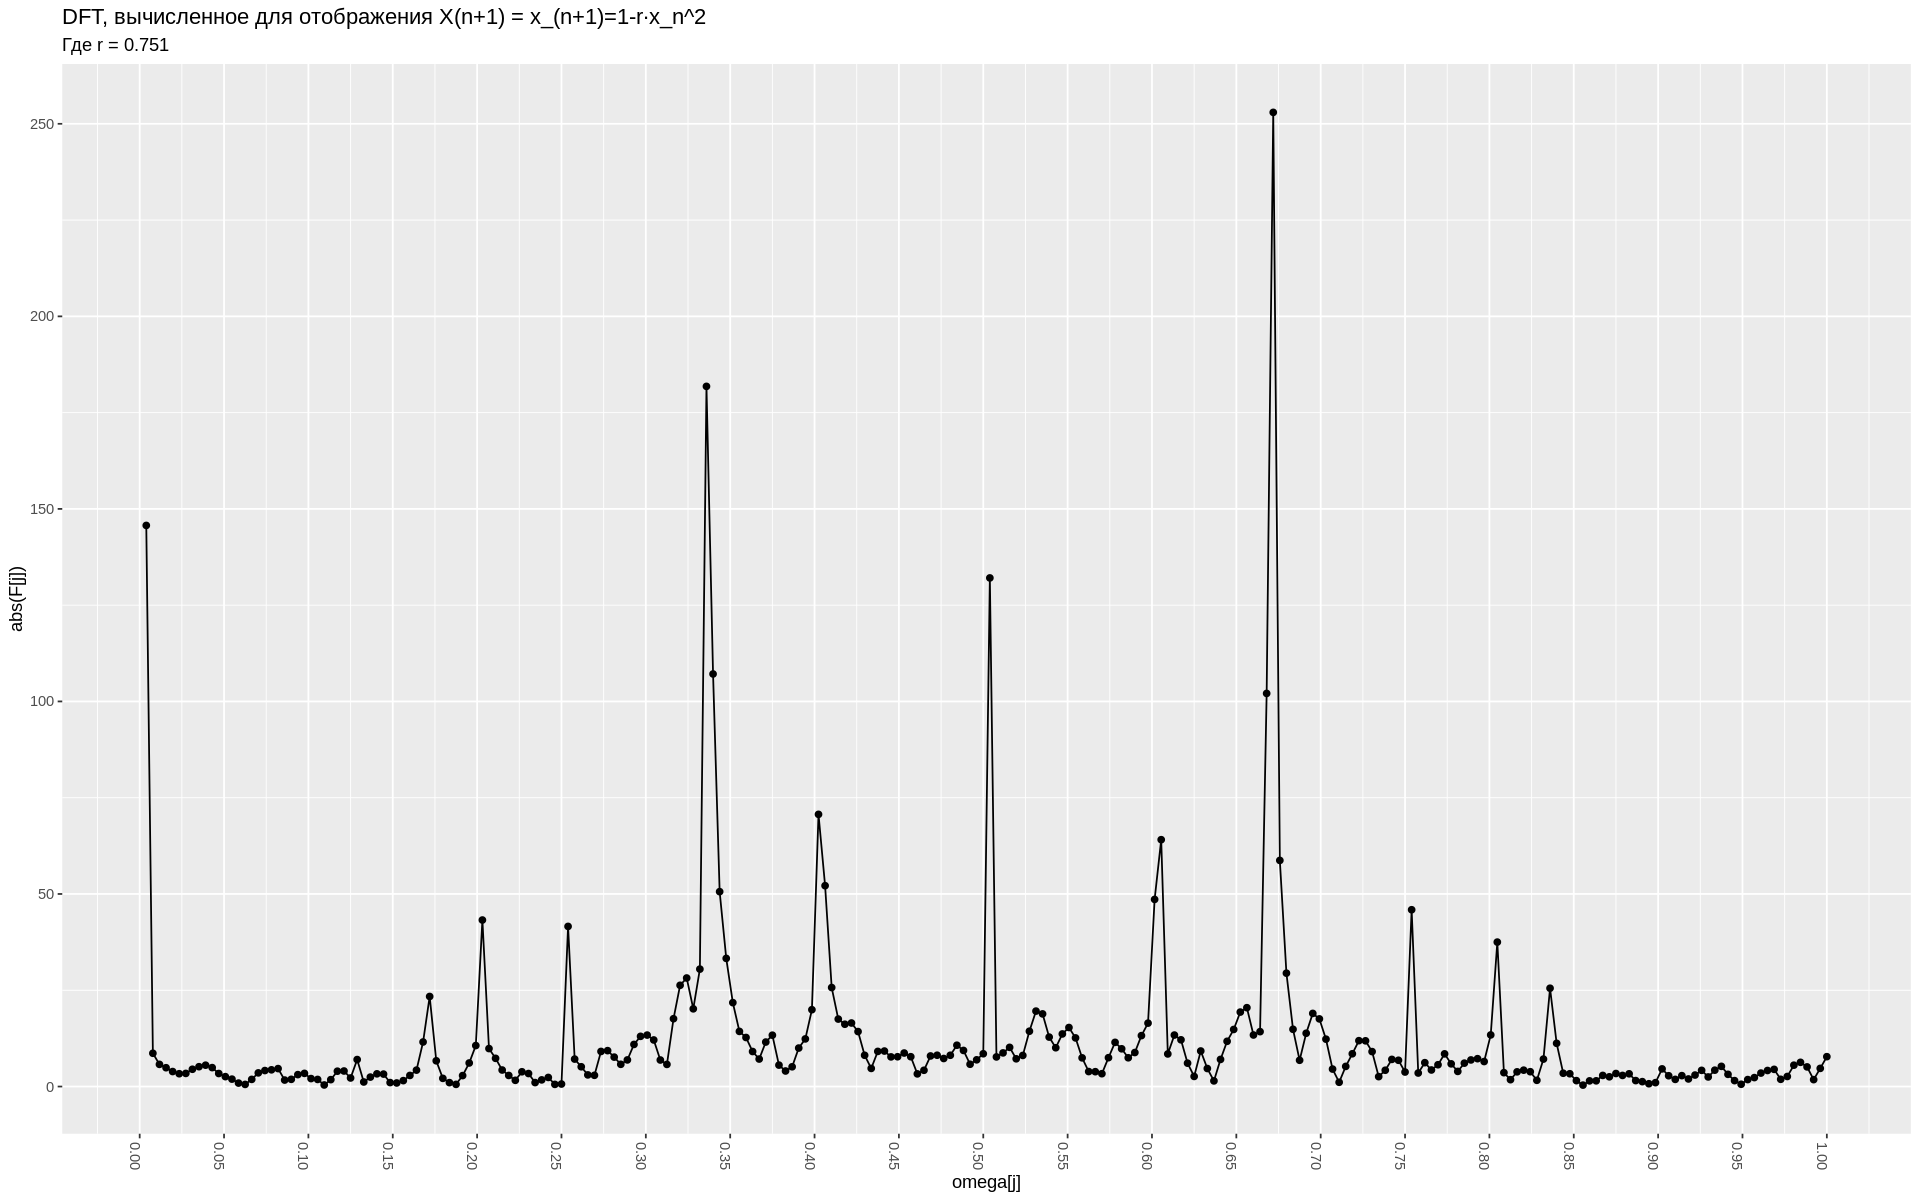

In [41]:
ggplot() +
    geom_point(aes( y = abs(FFT[, 3]), x = omega)) +
    geom_line(aes( y = abs(FFT[, 3]), x = omega)) +
    labs(title = paste("DFT, вычисленное для отображения X(n+1) = x_(n+1)=1-r·x_n^2"),
        subtitle = paste("Где r =", r[1]),
        x = "omega[j]",
        y = "abs(F[j])") +
    scale_x_continuous(breaks = seq(0, 1, 0.05)) +
    theme(axis.text.x = element_text(angle = 270, hjust = 1))